In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')
%matplotlib inline

In [72]:
# Define ODE
#f = lambda t, s: np.exp(-t) 
f = lambda t, s: 4/(1+s**2)

In [97]:
# Define parameters
h = 0.3 # Step size
t = np.arange(0, 1+h, h) # Numerical grid
s0 = 0 # Initial Condition

In [98]:
# Numerically solve ODE using off-the-shelf commands.
sol = solve_ivp(f, t, [s0], method='DOP853', dense_output=True)
z = sol.sol(t)

In [99]:
# Runge-Kutta method.
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    k1 = f(t[i], s[i])
    k2 = f(t[i] + h/2, s[i] + h*k1/2)
    k3 = f(t[i] + h/2, s[i] + h*k2/2)
    k4 = f(t[i + 1] , s[i] + h*k3)
    s[i + 1] = s[i] + h*( k1 + 2*k2 + 2*k3 + k4 )/6

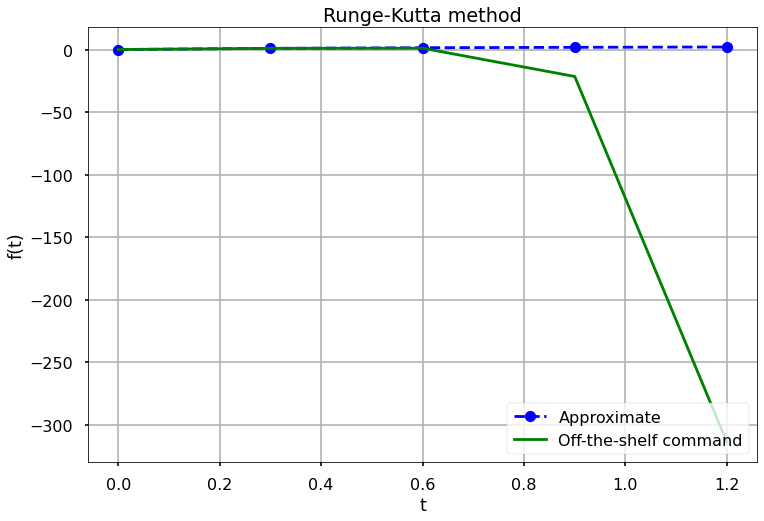

In [100]:
# Plotting results
plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, z.T, 'g', label='Off-the-shelf command')
plt.title('Runge-Kutta method')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()